# OpenML in Python 
OpenML is an online collaboration platform for machine learning: 

* Find or share interesting, well-documented datasets
* Define research / modelling goals (tasks)
* Explore large amounts of machine learning algorithms, with APIs in Java, R, Python
* Log and share reproducible experiments, models, results 
* Works seamlessly with scikit-learn and other libraries
* Large scale benchmarking, compare to state of the art

In [1]:
from IPython.display import set_matplotlib_formats, display, HTML
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

## Authentication

* Create an OpenML account (free) on http://www.openml.org. 
* After logging in, open your account page (avatar on the top right)
* Open 'Account Settings', then 'API authentication' to find your API key.

There are two ways to authenticate:  

* Create a plain text file `~/.openml/config` with the line 'apikey=MYKEY', replacing MYKEY with your API key.
* Run the code below, replacing 'YOURKEY' with your API key.

In [2]:
# Uncomment and set your OpenML key. Don't share your key with others.
import openml as oml
#oml.config.apikey = 'YOURKEY'

# It all starts with data
Explore thousands of datasets, or share your own

### List datasets

In [3]:
import openml as oml
openml_list = oml.datasets.list_datasets() # Returns a dict

# Show a nice table with some key data properties
import pandas as pd
datalist = pd.DataFrame.from_dict(openml_list, orient='index') 
datalist = datalist[['did','name','NumberOfInstances',
               'NumberOfFeatures','NumberOfClasses']]
print("First 10 of %s datasets..." % len(datalist))
datalist[:10]

First 10 of 19530 datasets...


,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
1,1,anneal,898.0,39.0,6.0
2,2,anneal,898.0,39.0,5.0
3,3,kr-vs-kp,3196.0,37.0,2.0
4,4,labor,57.0,17.0,2.0
5,5,arrhythmia,452.0,280.0,13.0
6,6,letter,20000.0,17.0,26.0
7,7,audiology,226.0,70.0,24.0
8,8,liver-disorders,345.0,7.0,-1.0
9,9,autos,205.0,26.0,6.0
10,10,lymph,148.0,19.0,4.0


### Exercise
- Find datasets with more than 10000 examples
- Find a dataset called 'eeg_eye_state'
- Find all datasets with more than 50 classes

In [4]:
datalist[datalist.NumberOfInstances>10000
        ].sort(['NumberOfInstances'])[:20]

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
23515,23515,sulfur,10081.0,7.0,-1.0
372,372,internet_usage,10108.0,72.0,46.0
981,981,kdd_internet_usage,10108.0,69.0,2.0
1536,1536,volcanoes-b6,10130.0,4.0,5.0
4562,4562,InternetUsage,10168.0,72.0,-1.0
1531,1531,volcanoes-b1,10176.0,4.0,5.0
1534,1534,volcanoes-b4,10190.0,4.0,5.0
1459,1459,artificial-characters,10218.0,8.0,10.0
1478,1478,har,10299.0,562.0,6.0
1533,1533,volcanoes-b3,10386.0,4.0,5.0


In [5]:
datalist.query('name == "MagicTelescope"')

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
1120,1120,MagicTelescope,19020.0,12.0,2.0


In [6]:
datalist.query('NumberOfClasses > 50')

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
1491,1491,one-hundred-plants-margin,1600.0,65.0,100.0
1492,1492,one-hundred-plants-shape,1600.0,65.0,100.0
1493,1493,one-hundred-plants-texture,1599.0,65.0,100.0
4546,4546,Plants,44940.0,16.0,57.0
4552,4552,BachChoralHarmony,5665.0,17.0,102.0
40753,40753,delays_zurich_transport,5465575.0,15.0,4082.0


## Download datasets
This is done based on the dataset ID ('did').

In [7]:
dataset = oml.datasets.get_dataset(1120)

# Print a summary
print("This is dataset '%s', the target feature is '%s'" % 
      (dataset.name, dataset.default_target_attribute))
print("URL: %s" % dataset.url)
print(dataset.description[:500])

This is dataset 'MagicTelescope', the target feature is 'class:'
URL: https://www.openml.org/data/v1/download/54003/MagicTelescope.ARFF
**Author**: R. K. Bock. Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)  
Donated by P. Savicky, Institute of Computer Science, AS of CR, Czech Republic  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/magic+gamma+telescope) - 2007  
**Please cite**:   

The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes 


Get the actual data.  
Returned as numpy array, with meta-info (e.g. target feature, feature names,...)

In [8]:
X, y, attribute_names = dataset.get_data(
    target=dataset.default_target_attribute, 
    return_attribute_names=True)
eeg = pd.DataFrame(X, columns=attribute_names)
eeg['class'] = y
print(eeg[:10])

     fLength:     fWidth:  fSize:  fConc:  fConc1:      fAsym:   fM3Long:  \
0   28.796700   16.002100  2.6449  0.3918   0.1982   27.700399  22.011000   
1   31.603600   11.723500  2.5185  0.5303   0.3773   26.272200  23.823799   
2  162.052002  136.031006  4.0612  0.0374   0.0187  116.740997 -64.858002   
3   23.817200    9.572800  2.3385  0.6147   0.3922   27.210699  -6.463300   
4   75.136200   30.920500  3.1611  0.3168   0.1832   -5.527700  28.552500   
5   51.624001   21.150200  2.9085  0.2420   0.1340   50.876099  43.188702   
6   48.246799   17.356501  3.0332  0.2529   0.1515    8.573000  38.095699   
7   26.789700   13.759500  2.5521  0.4236   0.2174   29.633900  20.455999   
8   96.232697   46.516499  4.1540  0.0779   0.0390  110.355003  85.048599   
9   46.761902   15.199300  2.5786  0.3377   0.1913   24.754801  43.877102   

   fM3Trans:    fAlpha:      fDist:  class  
0  -8.202700  40.091999   81.882797      0  
1  -9.957400   6.360900  205.261002      0  
2 -45.216000  76.

### Exercise
- Explore the data visually

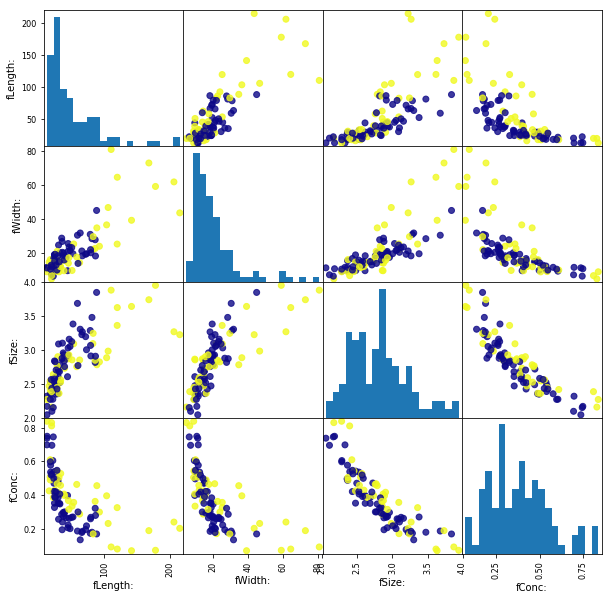

In [9]:
%matplotlib inline
eegs = eeg.sample(n=1000)
pd.scatter_matrix(eegs.iloc[:100,:4], c=eegs[:100]['class'], figsize=(10, 10), 
                  marker='o', hist_kwds={'bins': 20}, 
                  alpha=.8, cmap='plasma');

## Train machine learning models
Train a scikit-learn model on the data manually

In [10]:
from sklearn import neighbors

dataset = oml.datasets.get_dataset(1120)
X, y = dataset.get_data(target=dataset.default_target_attribute)
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

You can also ask for meta-data to automatically preprocess the data
- e.g. categorical features -> do feature encoding

In [11]:
from sklearn import preprocessing
dataset = oml.datasets.get_dataset(10)
X, y, categorical = dataset.get_data(
    target=dataset.default_target_attribute,
    return_categorical_indicator=True)
print("Categorical features: %s" % categorical)
enc = preprocessing.OneHotEncoder(categorical_features=categorical)
X = enc.fit_transform(X)
clf.fit(X, y)

Categorical features: [True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, False]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Tasks: set your own goals
and invite others to work on the same problem  
Note: tasks are typically created in the web interface

## Listing tasks

In [12]:
task_list = oml.tasks.list_tasks(size=5000) # Get first 5000 tasks

mytasks = pd.DataFrame(task_list).transpose()
mytasks = mytasks[['tid','did','name','task_type','estimation_procedure','evaluation_measures']]
#print(mytasks.columns)
print("First 5 of %s tasks:" % len(mytasks))
print(mytasks.head())

First 5 of 5000 tasks:
  tid did        name                  task_type     estimation_procedure  \
1   1   1      anneal  Supervised Classification  10-fold Crossvalidation   
2   2   2      anneal  Supervised Classification  10-fold Crossvalidation   
3   3   3    kr-vs-kp  Supervised Classification  10-fold Crossvalidation   
4   4   4       labor  Supervised Classification  10-fold Crossvalidation   
5   5   5  arrhythmia  Supervised Classification  10-fold Crossvalidation   

   evaluation_measures  
1  predictive_accuracy  
2  predictive_accuracy  
3  predictive_accuracy  
4  predictive_accuracy  
5  predictive_accuracy  


### Exercise
Search for the tasks on the 'eeg-eye-state' dataset

In [13]:
print(mytasks.query('name=="MagicTelescope"'))

         tid   did            name                              task_type  \
3954    3954  1120  MagicTelescope              Supervised Classification   
4659    4659  1120  MagicTelescope              Supervised Classification   
7228    7228  1120  MagicTelescope  Supervised Data Stream Classification   
10067  10067  1120  MagicTelescope                         Learning Curve   

                   estimation_procedure  evaluation_measures  
3954            10-fold Crossvalidation  predictive_accuracy  
4659   10 times 10-fold Crossvalidation  predictive_accuracy  
7228        Interleaved Test then Train                  NaN  
10067            10-fold Learning Curve                  NaN  


## Download tasks

In [14]:
from pprint import pprint
task = oml.tasks.get_task(3954)
pprint(vars(task))

{'class_labels': ['g', 'h'],
 'cost_matrix': None,
 'dataset_id': 1120,
 'estimation_parameters': {'number_folds': '10',
                           'number_repeats': '1',
                           'percentage': '',
                           'stratified_sampling': 'true'},
 'estimation_procedure': {'data_splits_url': 'https://www.openml.org/api_splits/get/3954/Task_3954_splits.arff',
                          'parameters': {'number_folds': '10',
                                         'number_repeats': '1',
                                         'percentage': '',
                                         'stratified_sampling': 'true'},
                          'type': 'crossvalidation'},
 'evaluation_measure': 'predictive_accuracy',
 'split': None,
 'target_name': 'class:',
 'task_id': 3954,
 'task_type': 'Supervised Classification',
 'task_type_id': 1}


# Runs: Easily explore models by running them on tasks
We can run (many) scikit-learn algorithms on (many) OpenML tasks.

In [15]:
from sklearn import ensemble

# Get a task
task = oml.tasks.get_task(3954)

# Build any classifier or pipeline
clf = ensemble.RandomForestClassifier()

# Create a flow
flow = oml.flows.sklearn_to_flow(clf)

# Run the flow 
run = oml.runs.run_flow_on_task(task, flow)

Share the run on the OpenML server

In [16]:
myrun = run.publish()
print("Uploaded to http://www.openml.org/r/" + str(myrun.run_id))

Uploaded to http://www.openml.org/r/6068436


### It also works with pipelines
When you need to handle 'dirty' data, build pipelines to model then automatically

In [17]:
from sklearn import pipeline, ensemble, preprocessing
from openml import tasks,runs, datasets
task = tasks.get_task(59)
pipe = pipeline.Pipeline(steps=[
            ('Imputer', preprocessing.Imputer(strategy='median')),
            ('OneHotEncoder', preprocessing.OneHotEncoder(sparse=False, handle_unknown='ignore')),
            ('Classifier', ensemble.RandomForestClassifier())
           ])
flow = oml.flows.sklearn_to_flow(pipe)

run = oml.runs.run_flow_on_task(task, flow)
myrun = run.publish()
print("Uploaded to http://www.openml.org/r/" + str(myrun.run_id))

Uploaded to http://www.openml.org/r/6068437


## Download previous results
You can download all your results anytime, as well as everybody else's

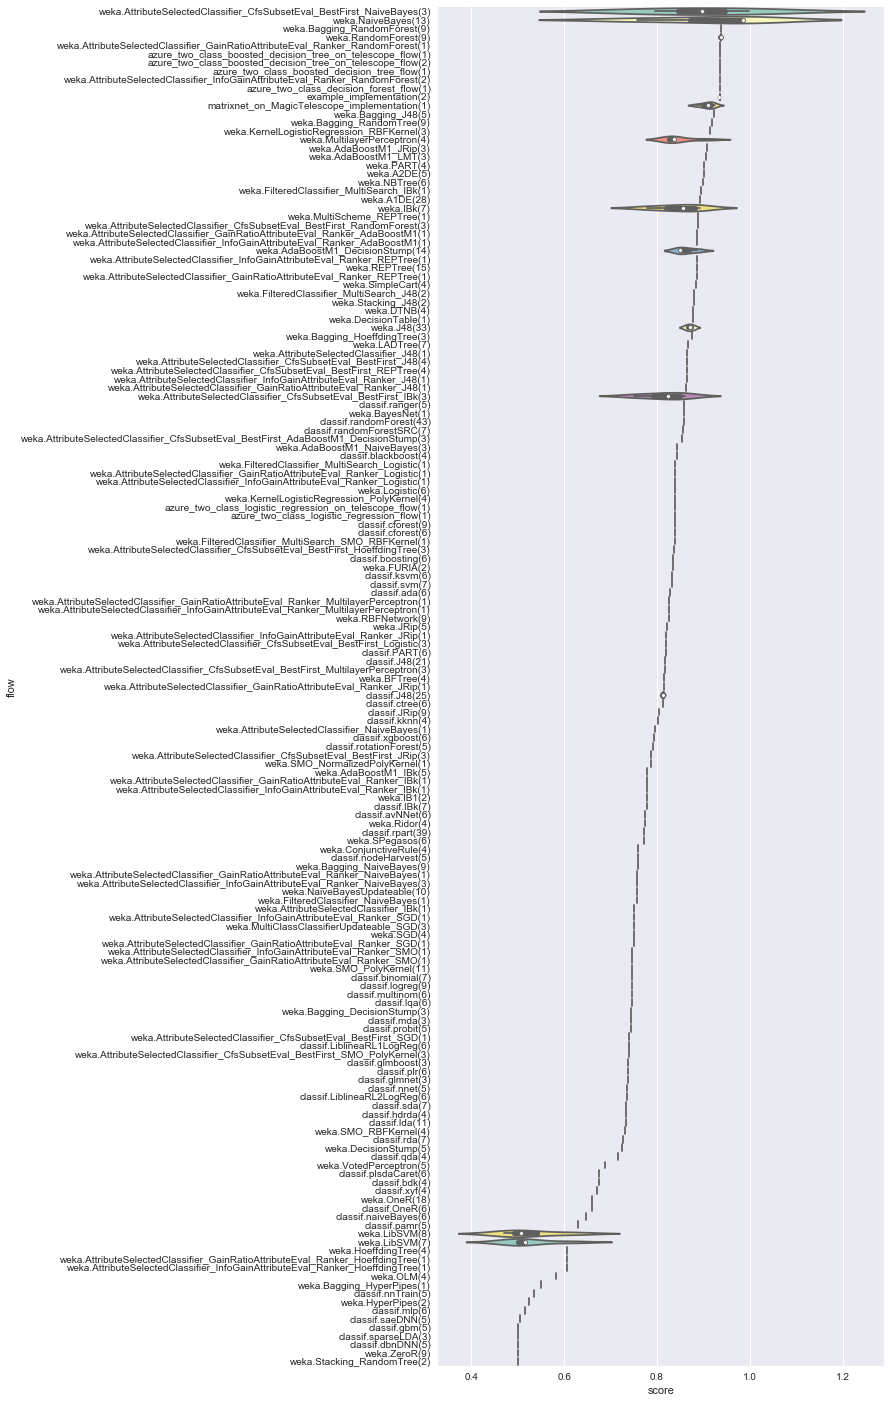

In [40]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot
from openml import evaluations

# Get the list of runs for task 3954
evaluations = oml.evaluations.list_evaluations(task=[3954], function='area_under_roc_curve', size=200)

# Download the tasks and plot the scores
scores = []
for id, e in evaluations.items():
    scores.append({"flow":e.flow_name, "score":e.value})
    
sorted_score = sorted(scores, key=lambda x: -x["score"])
fig, ax = pyplot.subplots(figsize=(8, 25))    
sns.violinplot(ax=ax, x="score", y="flow", data=pd.DataFrame(sorted_score), scale="width", palette="Set3");

Easy benchmarking:

In [25]:
import openml as oml
from sklearn import neighbors

for task_id in [14951,10103]:
    task = oml.tasks.get_task(task_id)
    data = oml.datasets.get_dataset(task.dataset_id)
    clf = neighbors.KNeighborsClassifier(n_neighbors=5)
    flow = oml.flows.sklearn_to_flow(clf)
    
    try:
        run = oml.runs.run_flow_on_task(task, flow)
        myrun = run.publish()
        print("kNN on %s: http://www.openml.org/r/%d" % (data.name, myrun.run_id))
    except oml.exceptions.PyOpenMLError as err:
        print("OpenML: {0}".format(err))

OpenML: Run already exists in server. Run id(s): {6068464}
OpenML: Run already exists in server. Run id(s): {6068467}


## A Challenge
Try to build the best possible models on several OpenML tasks, and compare your results with the rest of the class, and learn from them. Some tasks you could try (or browse openml.org):

* EEG eye state: data_id:[1471](http://www.openml.org/d/1471), task_id:[14951](http://www.openml.org/t/14951)
* Volcanoes on Venus: data_id:[1527](http://www.openml.org/d/1527), task_id:[10103](http://www.openml.org/t/10103)
* Walking activity: data_id:[1509](http://www.openml.org/d/1509), task_id: [9945](http://www.openml.org/t/9945), 150k instances
* Covertype (Satellite): data_id:[150](http://www.openml.org/d/150), task_id: [218](http://www.openml.org/t/218). 500k instances
* Higgs (Physics): data_id:[23512](http://www.openml.org/d/23512), task_id:[52950](http://www.openml.org/t/52950). 100k instances, missing values